# CSI 4116 - Homework 6 (Due 12/14 at 11:59 PM)
## Introduction

For HW 6, we will use this Python Jupyter Notebook in Google Colab based on an amazing online textbook: [d2l.ai](https://d2l.ai/). Specifically, this is largely based on Chapter 7 and its PyTorch code: [d2l.ai CNN LeNet](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html).

### Google Colab:
1. Google Colab allows you to run Python code online. In particular, we will rely on Jupyter Notebook (.ipynb which you are running now) which allows a series of markdown instructions and Python code cells. You simply have to follow the instruction and run the provided code cells.
1. How to use: login with your Google account, and run this file in Colab.

### GPU vs. CPU:
1. GPU: You may use its "free" GPU for a short time, enough for you to train and test your model. However, you may not be able to use GPU as much as you want (1) if there are too many Colab users and/or (2) if you have used up all your resources. This may unexpectedly happen.
    1. `Edit -> Notebook settings -> Hardware Accelerator -> GPU`
1. CPU: This assignment is completely feasible with CPU. It is slower than GPU (1 min GPU vs. 5 min CPU). However, this is the safer option if you want to continuously try various changes for Part 2.
    1. `Edit -> Notebook settings -> Hardware Accelerator -> None`


### Summary:
1. **Part 1: LeNet and Fashion-MNIST**. You will NOT implement anything new. You simply have to run each "cell" to reproduce the training and testing of a CNN model called LeNet. The dataset is called *Fashin-MNIST*: a collection of 28x28 images of 10 apparel types (10 classes).
1. **Part 2: Beat LeNet with YonseiNet**. You will improve LeNet by making some simple modifications to the model. We will call this **YonseiNet**. I will provide a list of possible modifications for you to choose from. Overall, it is up to you to find ways to improve it. You can also try other changes which I do not provide.


### What to submit:
1. Your `CSI4116-HW6.ipynb`: Once you run the entire notebook with your desired solution and written response, download the entire output as your own ipynb: `File -> Download -> Download ipynb`. This will save `CSI4116-HW6.ipynb` which you will submit. This allows me to see *exactly* what you see in your Colab, so make sure you save after all othe outputs you want are shown in Colab when you save.

### Grading: 50 pts total
1. **[25 pts]**: Successfully running Part 1.
1. **[15 pts]**: Achieve over 0.8 validation_accuracy with YonseiNet in Part 2.
1. **[5 pts]**: Achieve over 0.85 validation_accuracy with YonseiNet in Part 2.
1. **[5 pts]**: Write down what you changed at the end of this notebook file.


### Notes:
1. If you want, you can use a different IDE after downloading this notebook and run this locally.
1. CPU is not that slow. Based on my experience, the training takes ~5 mins for 10 epochs.
1. You may get some errors or warnings when displaying the figures. This is completely fine. I don't need to see figures, and they actually show on when I open your notebook locally.
1. Again, you do **not** need any Python experience to finish this assignment.
1. Be reasonable with your modifications. For example, no pretrained models. I will **not** take off points for trying too hard though.
1. Do not look for solutions online. Cheating will result in 0 for this assignment and I will report the case to the school.



---


## Part 1.1: Set up
First, we need to install necessary packages. Simply run the code below. You may run this multiple times, but once you install them, they will not be installed again in your session.

In [ ]:
!pip install d2l==1.0.0-alpha1.post0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00


## Part 1.2: Convolutional Neural Networks (LeNet)

In this section, we will introduce *LeNet*,
among the first published CNNs
to capture wide attention for its performance on computer vision tasks.
The model was introduced by (and named for) Yann LeCun,
then a researcher at AT&T Bell Labs,
for the purpose of recognizing handwritten digits in images :cite:`LeCun.Bottou.Bengio.ea.1998`.
This work represented the culmination
of a decade of research developing the technology.
In 1989, LeCun's team published the first study to successfully
train CNNs via backpropagation :cite:`LeCun.Boser.Denker.ea.1989`.

At the time LeNet achieved outstanding results
matching the performance of support vector machines,
then a dominant approach in supervised learning, achieving an error rate of less than 1% per digit.
LeNet was eventually adapted to recognize digits
for processing deposits in ATM machines.
To this day, some ATMs still run the code
that Yann LeCun and his colleague Leon Bottou wrote in the 1990s!


## LeNet

At a high level, (**LeNet (LeNet-5) consists of two parts:
(i) a convolutional encoder consisting of two convolutional layers; and
(ii) a dense block consisting of three fully connected layers**);
The architecture is summarized in :numref:`img_lenet`.

![Data flow in LeNet. The input is a handwritten digit, the output a probability over 10 possible outcomes.](http://d2l.ai/_images/lenet.svg)

The basic units in each convolutional block
are a convolutional layer, a sigmoid activation function,
and a subsequent average pooling operation.
Note that while ReLUs and max-pooling work better,
these discoveries had not yet been made at the time.
Each convolutional layer uses a $5\times 5$ kernel
and a sigmoid activation function.
These layers map spatially arranged inputs
to a number of two-dimensional feature maps, typically
increasing the number of channels.
The first convolutional layer has 6 output channels,
while the second has 16.
Each $2\times2$ pooling operation (stride 2)
reduces dimensionality by a factor of $4$ via spatial downsampling.
The convolutional block emits an output with shape given by
(batch size, number of channel, height, width).

In order to pass output from the convolutional block
to the dense block,
we must flatten each example in the minibatch.
In other words, we take this four-dimensional input and transform it
into the two-dimensional input expected by fully connected layers:
as a reminder, the two-dimensional representation that we desire uses the first dimension to index examples in the minibatch
and the second to give the flat vector representation of each example.
LeNet's dense block has three fully connected layers,
with 120, 84, and 10 outputs, respectively.
Because we are still performing classification,
the 10-dimensional output layer corresponds
to the number of possible output classes.


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def init_cnn(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

In [ ]:
class LeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

Let's see what happens inside the network. By passing a
single-channel (black and white)
$28 \times 28$ image through the network
and printing the output shape at each layer,
we can inspect the model to make sure
that its operations line up with
what we expect from below:

![Compressed notation for LeNet-5.](https://github.com/d2l-ai/d2l-pytorch-colab/blob/master/img/lenet-vert.svg?raw=1)


In [ ]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Note that the height and width of the representation
at each layer throughout the convolutional block
is reduced (compared with the previous layer).
The first convolutional layer uses 2 pixels of padding
to compensate for the reduction in height and width
that would otherwise result from using a $5 \times 5$ kernel.
As an aside, the image size of $28 \times 28$ pixels in the original
MNIST OCR dataset is a result of *trimming* 2 pixel rows (and columns) from the
original scans that measured $32 \times 32$ pixels. This was done primarily to
save space (a 30% reduction) at a time when Megabytes mattered.

In contrast, the second convolutional layer forgoes padding,
and thus the height and width are both reduced by 4 pixels.
As we go up the stack of layers,
the number of channels increases layer-over-layer
from 1 in the input to 6 after the first convolutional layer
and 16 after the second convolutional layer.
However, each pooling layer halves the height and width.
Finally, each fully connected layer reduces dimensionality,
finally emitting an output whose dimension
matches the number of classes.


## Part 1.3: Training

Now that we have implemented the model,
let's run an experiment to see how the LeNet-5 model fares on Fashion-MNIST.

While CNNs have fewer parameters,
they can still be more expensive to compute
than similarly deep MLPs
because each parameter participates in many more
multiplications.
If you have access to a GPU, this might be a good time
to put it into action to speed up training.
Note that
the `d2l.Trainer` class takes care of all details.
By default, it initializes the model parameters on the
available devices.
Just as with MLPs, our loss function is cross-entropy,
and we minimize it via minibatch stochastic gradient descent.


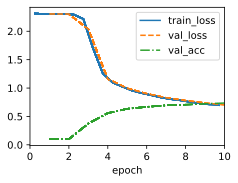

In [ ]:
torch.manual_seed(0)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

Now, check the train accuracy of LeNet

In [ ]:
train_accuracy = d2l.evaluate_accuracy_gpu(model, data.get_dataloader(True))
print('train_accuracy: ' + str(train_accuracy))

train_accuracy: 0.7407


And check the validation accuracy

In [ ]:
validation_accuracy = d2l.evaluate_accuracy_gpu(model, data.get_dataloader(False))
print('validation_accuracy: ' + str(validation_accuracy))

validation_accuracy: 0.7346


Accuracy is the most basic metric for evaluating the classification result. Simply, this is the ratio of the correct predictions over the total number of examples. For a 10 class dataset, the validation accuracy of ~0.73 is not bad.

This is the end of Part 1. If you were able to get ~0.74 training accuracy and ~0.73 validation accuracy, you are good to move on to Part 2.

---

## Part 2: Modify YonseiNet to beat LeNet


You are now going to improve LeNet and create YonseiNet. We will not be implementing anything new. Instead, we will simply modify the network architecture and training hyperparameters (learning rate, epochs, batch_size)

Below are examples of changes you can make:
1. Change average pooling to max pooling:
        AvgPool2d -> MaxPool2d

1. Change the convolution window size (below is one example):
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
        ->
        nn.LazyConv2d(6, kernel_size=?, padding=?), nn.ReLU(),

1. Change the number of output channels (below is one example):
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
        ->
        nn.LazyConv2d(?, kernel_size=5, padding=5), nn.ReLU(),

1. Change the nonlinear activation functions from Sigmoid to ReLU:
        nn.Sigmoid() -> nn.ReLU(),
1. Change the learning rate:
        lr=0.1 -> lr=?
1. Change the batch size:
        batch_size=128 -> batch_size=?
1. Change the maximum number of epochs for training (note this
        trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
        ->
        trainer = d2l.Trainer(max_epochs=?, num_gpus=1)

1. Add more fully connected layers (below is one example):
        nn.LazyLinear(120), nn.Sigmoid(),
        nn.LazyLinear(84), nn.Sigmoid(),
        nn.LazyLinear(num_classes))
        ->
        nn.LazyLinear(120), nn.Sigmoid(),
        nn.LazyLinear(84), nn.Sigmoid(),
        nn.LazyLinear(?), nn.Sigmoid(),
        nn.LazyLinear(num_classes))
1. Add more convolutional layers:
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        ->
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(32, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),




## Part 2.1: Beat LeNet with YonseiNet

Below, I copied LeNet and named it YonseiNet. Now, it is your turn to modify it and improve it. Feel free to refer to the examples above, or try anything new on your own.

In [ ]:
# Modify YonseiNet below
class YonseiNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

YonseiNet().layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


Train YonseiNet and check the train and validation accuracies.

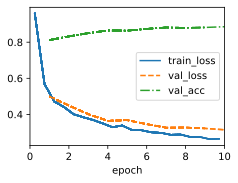

In [ ]:
# Changing max_epochs
torch.manual_seed(0)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model_ynet = YonseiNet()
model_ynet.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model_ynet, data)

In [ ]:
train_accuracy = d2l.evaluate_accuracy_gpu(model_ynet, data.get_dataloader(True))
print('YonseiNet train_accuracy: ' + str(train_accuracy))

YonseiNet train_accuracy: 0.90505


In [ ]:
validation_accuracy = d2l.evaluate_accuracy_gpu(model_ynet, data.get_dataloader(False))
print('YonseiNet validation_accuracy: ' + str(validation_accuracy))

YonseiNet validation_accuracy: 0.8854


Check your YonseiNet validation accuracy. For your reference, I was able to achieve the validation accuracy of 0.891 with my YonseiNet.

## Part 2.2: Write  Your Changes
Here, write the changes you have made; double click this part and write below. (double click this cell)

**Your Name**: Aziza K. Shukurova

**Your ID**: 2020147599

**Changes you made**:
AvgPool2d -> MaxPool2d;
nn.Sigmoid() -> nn.ReLU()



---
## End of HW 6
Don't forget to save the **full** output of your work as .ipynb and submit it.